<a href="https://colab.research.google.com/github/ziedjouini/Data_Projects/blob/main/zied_california2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Dataset: Simpler Toy Dataset

In [ ]:
# Libeary imports
import numpy as np

from sklearn.datasets import fetch_california_housing

In [ ]:
# https://www.youtube.com/watch?v=dy97dQ1P2WI
#More about dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)

In [ ]:
print('Shape of X is:', X_california.shape)
print('Shape of y is:', y_california.shape)

Shape of X is: (20640, 8)
Shape of y is: (20640,)


In [ ]:
X_california.head()
# MedInc is scaled and capped at 15. Example: 3 means $30k, and so-on

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y_california.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
# Visulize the Geographical Data

In [ ]:
#X_california.plot(kind="scatter", x="Longitude", y="Latitude", c = "MedInc", colorbar=True)

<Axes: xlabel='Longitude', ylabel='Latitude'>

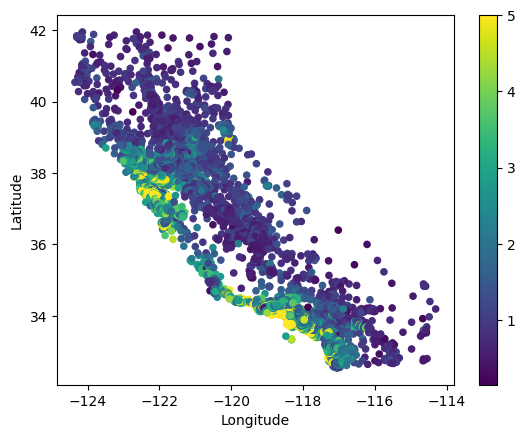

In [ ]:
X_california.plot(kind="scatter", x="Longitude", y="Latitude", c = y_california, colorbar=True)

In [ ]:
#X_california.plot(kind="scatter", x="Longitude", y="Latitude", alpha = 0.1)

In [ ]:
# See more details about individual values
X_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Plot the values

In [ ]:
# import matplotlib.pyplot as plt
# X_california.hist(bins=20, figsize=(10,8))
# plt.show()

# Pre-process the data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('std_scaler', StandardScaler()),
        ])

X_california = num_pipeline.fit_transform(X_california)

# Random Sampling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_california, y_california, test_size=0.33, random_state=42)

# Evaluate a Set of Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
def evalute_model(model):
  # Train Model
  model.fit(X_train, y_train)
  # Get predictions
  Pred = model.predict(X_test)
  # Get error
  mse = mean_squared_error(y_test, Pred)
  print('MSE is: ', round(mse, 2))

  #plot some of the predictions
  from matplotlib import pyplot as plt
  fig = plt.figure()
  fig.set_size_inches(10, 3)
  plt.plot(Pred[:150], label = 'predictions')
  plt.plot(y_test.values[:150], label = 'Truth')
  plt.legend()
  plt.show()

# Linear Regression

MSE is:  0.54


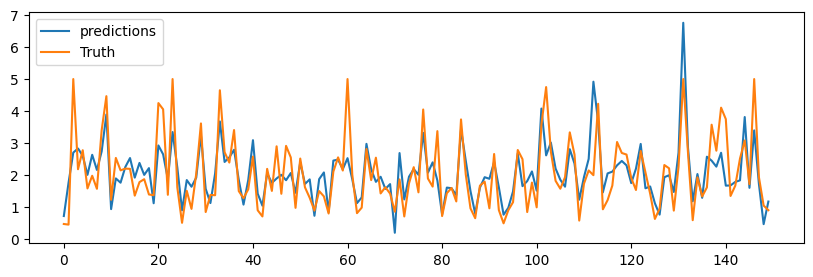

In [ ]:
model = LinearRegression()
evalute_model(model)

# Decision Tree

MSE is:  0.53


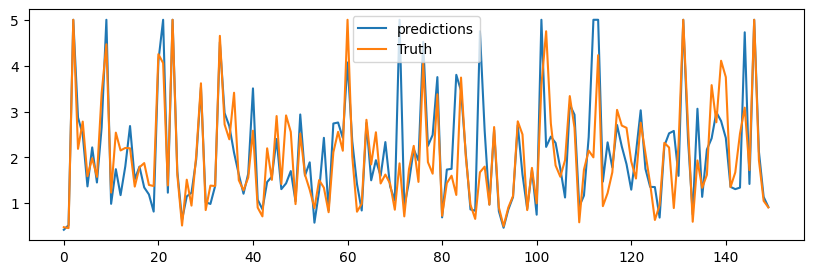

In [ ]:
model = DecisionTreeRegressor()
evalute_model(model)

# k-nearest neighbors.

MSE is:  0.43


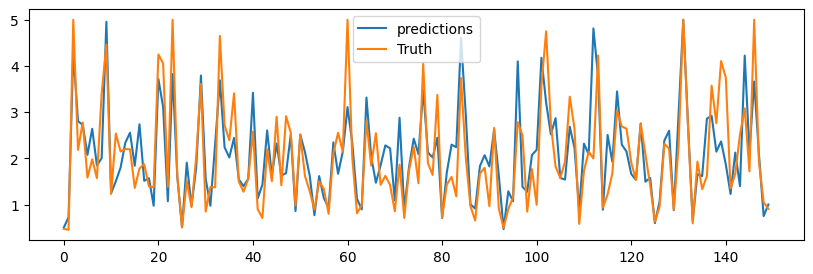

In [ ]:
model = KNeighborsRegressor()
evalute_model(model)

# Support Vector

MSE is:  0.35


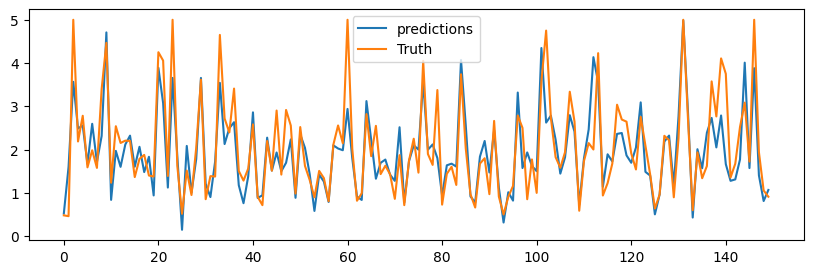

In [ ]:
model = SVR()
evalute_model(model)

# Random Forest

MSE is:  0.26


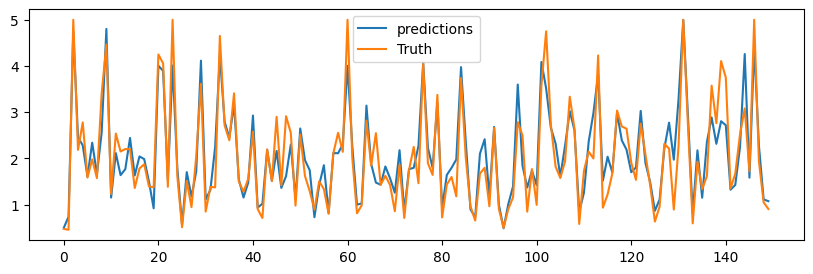

In [ ]:
model = RandomForestRegressor(n_estimators = 50)
evalute_model(model)